<a href="https://colab.research.google.com/github/amazzoli/ComponentSystemsData/blob/main/datasets/lego/inspect_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cloning the repository in the colab folder structure
%%bash
git clone https://github.com/amazzoli/ComponentSystemsData.git

Cloning into 'ComponentSystemsData'...
Updating files: 100% (10/10), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys

# Changing directory where the notebook is placed
os.chdir('/content/ComponentSystemsData/datasets/lego')

sys.path.append('/content/ComponentSystemsData/py_utils/')
import plot_utils as pu

# Inspecting lego objects: **LEGO sets**

The table `objects.tsv` contains information about legos:

- **sparse_id**: identifier of the matrix coordinates in the sparse representation.
- **set_id**: identifier of the database https://rebrickable.com/.
- **name**: extended name.
- **year**: year of release.
- **n_themes**: number of associate themes (maximum 3).
- **theme1** - **theme3**: themes in increasing resolutions.
- **size**: number of bricks in the set.
- **vocabulary**: number of different brick types in the set.

In [3]:
data_folder = 'data/'
objects = pd.read_csv(data_folder+'objects.tsv', sep='\t', index_col=0)
objects

,set_id,name,year,n_themes,theme1,theme2,theme3,size,vocabulary
sparse_id,,,,,,,,,
12800,7349-1,Skater Boy,2004.0,3,Duplo,Town,Legoville,2,2
17890,Sp12-1,Wheel Bearings for Locomotives,1977.0,2,Service Packs,Train,NaN,2,1
20544,fig-002544,BB-8,NaN,1,Minifigure,NaN,NaN,2,2
26667,fig-008787,"Baby - Bright Light Blue Body, Bib",NaN,1,Minifigure,NaN,NaN,2,2
12842,7450-1,Stretchy,2003.0,2,Duplo,Little Robots,NaN,2,2
...,...,...,...,...,...,...,...,...,...
13058,75192-1,Millennium Falcon,2017.0,2,Star Wars,Ultimate Collector Series,NaN,7691,704
328,10276-1,Colosseum,2020.0,1,Icons,NaN,NaN,9125,220
344,10294-1,Titanic,2021.0,1,Icons,NaN,NaN,9185,692


### Size distribution

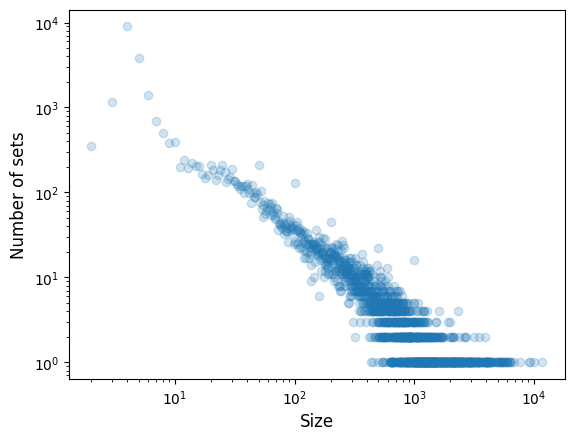

In [4]:
fig, ax = plt.subplots()
ax = pu.plot_count_hist_nobin(ax, objects['size'],
                           xlabel='Size', ylabel='Number of sets',
                           loglog=True, alpha=0.2)

### Heaps' law

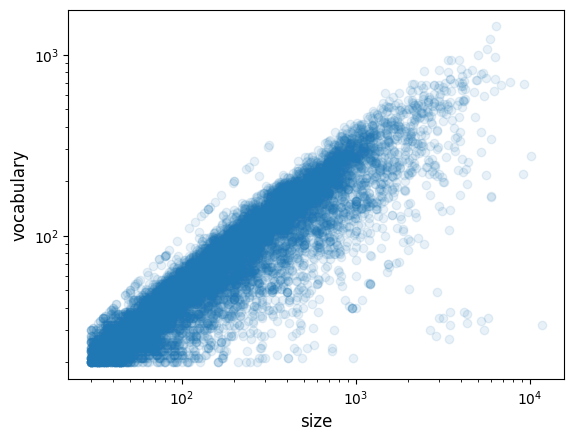

In [5]:
min_size = 30
min_voc = 20
mask = np.logical_and(objects['size'] >= min_size, objects['vocabulary'] >= min_voc)
xs = objects[mask]['size']
ys = objects[mask]['vocabulary']

plt.xlabel('size', fontsize=12)
plt.ylabel('vocabulary', fontsize=12)
plt.loglog()
img = plt.scatter(xs, ys, alpha=0.1)

### LEGO set counts of categories

Text(0.5, 1.0, 'LEGO set per year. No annotated year for 15504 objects')

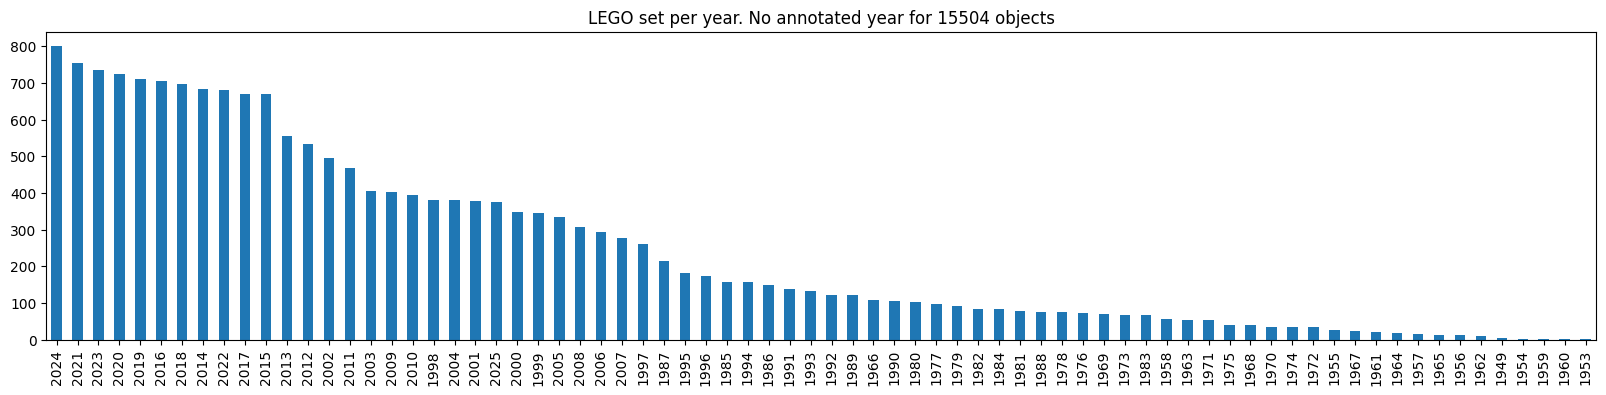

In [6]:
fig, ax = plt.subplots(figsize=(20, 4))
years = objects[objects['year'].notna()]['year'].astype(int)

pu.plot_sorted_bar(ax, years.value_counts())
ax.set_title('LEGO set per year. No annotated year for '+str(np.sum(objects.year.isna())) + ' objects')

Text(0.5, 1.0, 'LEGO set per main theme. No annotated themes for 0 objects')

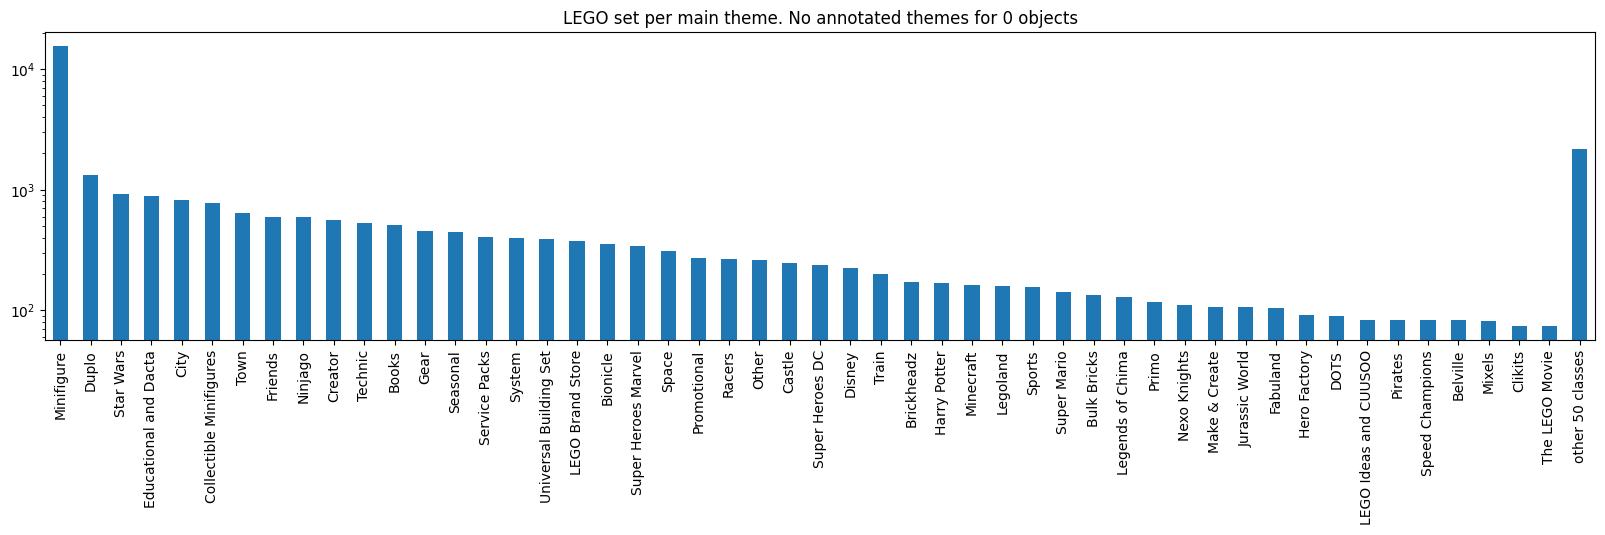

In [7]:
fig, ax = plt.subplots(figsize=(20, 4))
themes = objects[objects['theme1'].notna()]['theme1']

ax.set_yscale('log')
pu.plot_sorted_bar(ax, themes.value_counts(), n_classes=50)
ax.set_title('LEGO set per main theme. No annotated themes for '+str(np.sum(objects.theme1.isna())) + ' objects')